In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from imblearn.datasets import fetch_datasets
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


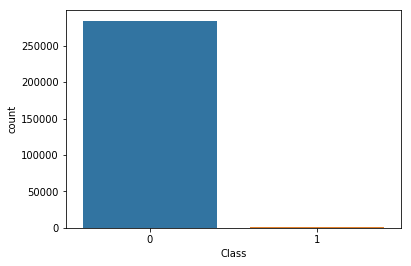

In [5]:
sns.countplot(df['Class'])

As we can clearly see classes are totally imbalanced so we might have to consider sampling techniques like
undersampling and oversampling. Notice how imbalanced is our original dataset! Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

The first thing we must do is gather a basic sense of our data. Remember, except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

there are no missing values in our dataset

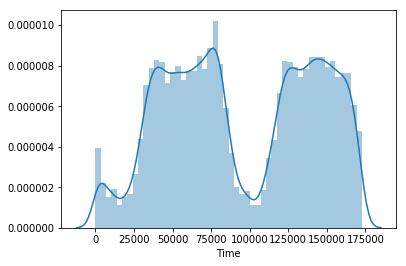

In [7]:
sns.distplot(df['Time'])

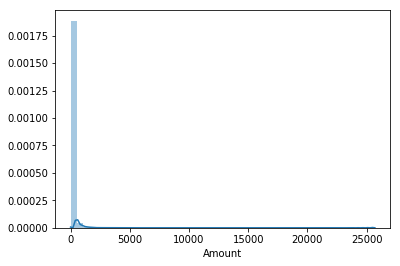

In [8]:
sns.distplot(df['Amount'])

First things First ,we have to scale amount and time like other variables.
On the other hand,we need to create subsample of the dataframe in order to have equal amount of Fraud and Non-Fraud
Transactions,helping our algorithms to better recognize the patterns

Our subsample will have 50-50 ratio of these cases

Why do we create a sub-Sample?

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:

Overfitting: Our classification models will assume that in most cases there are no frauds! What we want for our model is to be certain when a fraud occurs.

Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (Fraud or No Fraud) by having an imbalance dataframe we are not able to see the true correlations between the class and feature

In [9]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
df['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = std_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.drop(['Time','Amount'], axis=1, inplace=True)

In [10]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [11]:
y=df['Class']
X=df.drop('Class',axis=1)

In [12]:
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.244964,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.342475,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.160686,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,0.140534,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.073403,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [13]:
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0][0:700]
under_df=pd.concat([fraud,non_fraud],axis=0)
under_df = under_df.sample(frac=1, random_state=42)
print(under_df.shape)
under_df.head()


(1192, 31)


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
428,-0.264912,-1.990055,-1.013287,0.512380,0.837259,0.408468,2.078535,4.692662,-0.294088,0.898044,...,0.207566,-0.470714,-0.879661,-0.147591,1.003181,0.118079,-0.460627,-0.271700,0.012446,0
120505,0.045980,-0.399318,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,...,0.342122,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395,1
128479,-0.113344,-0.338798,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454,1
55401,-0.349231,-1.008440,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,...,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463,1
74,-0.246401,-1.995572,-1.793406,1.854604,0.979514,1.112262,-0.206403,-0.199546,0.616642,0.064180,...,0.667847,-0.180723,0.235138,-0.091442,0.417654,0.122734,-0.232985,0.811880,0.618568,0


0    700
1    492
Name: Class, dtype: int64


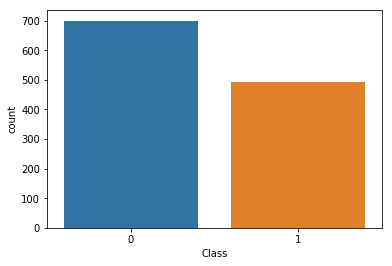

In [14]:
print(under_df['Class'].value_counts())
sns.countplot(under_df['Class'])

finally the classes are balanced and scaled we can use this dataframe to find patterns and classifying whether 
the transaction is fraud or not.

Now let's see how our features are correlated using heatmap 

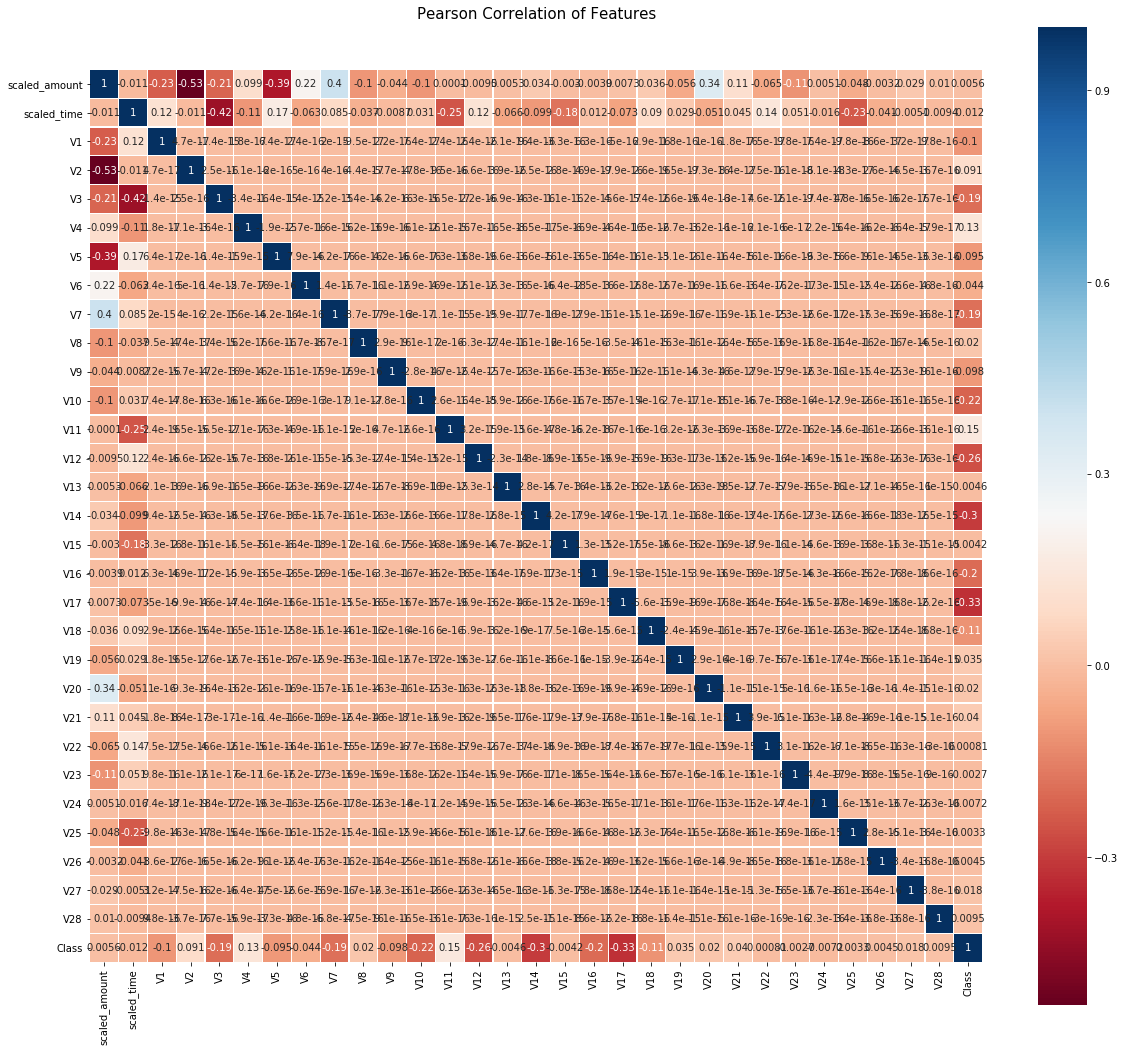

In [15]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

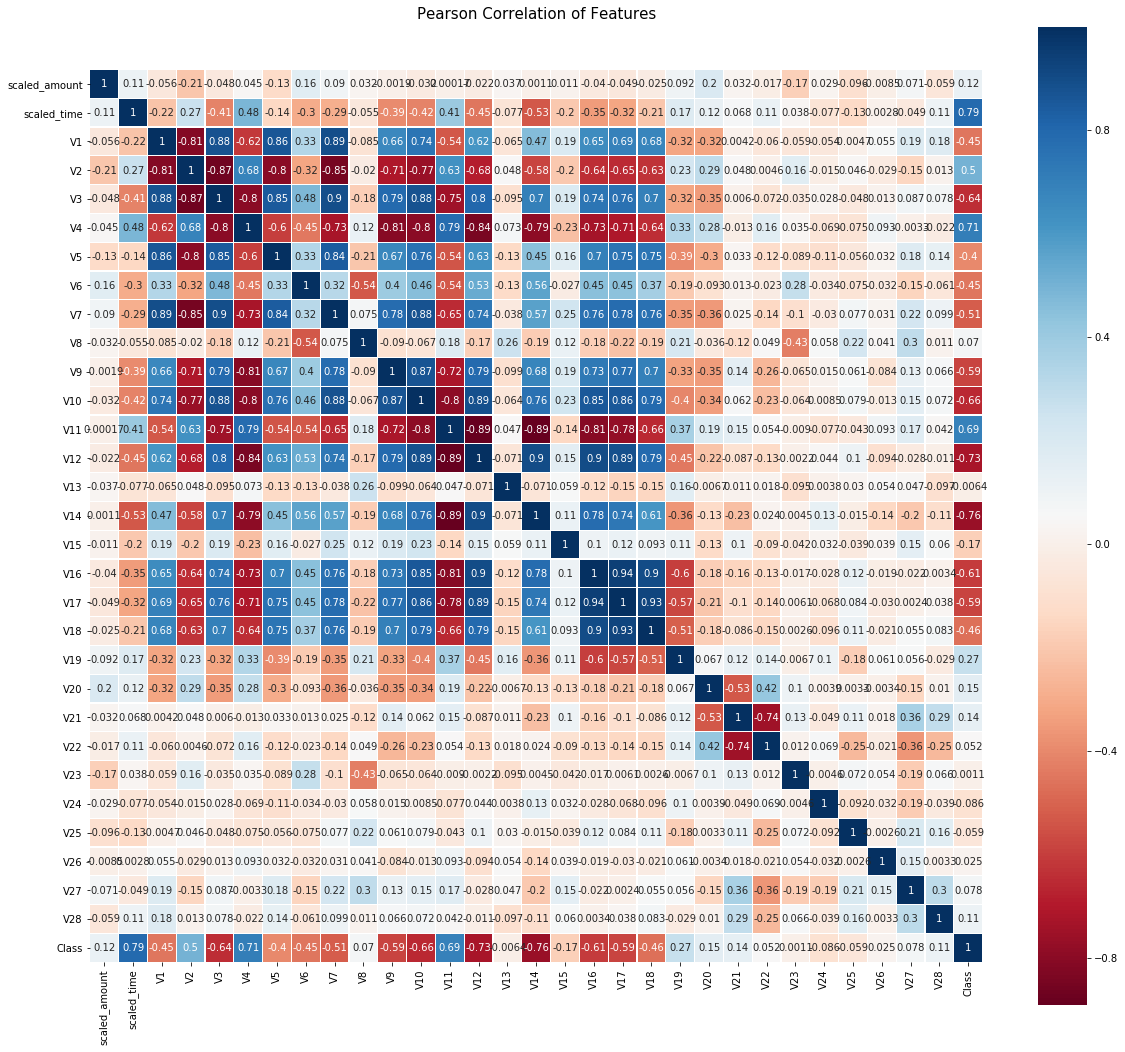

In [16]:
colormap = plt.cm.RdBu
plt.figure(figsize=(20,18))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(under_df.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

Clearly how the correlation matrix changes when we made classes balance it's usually difficult to recognize patterns 
in imbalanced classes that's why it is preffered to make classes balance and then use it for visualization and 
modelling.
V10,V12,V14,V16,V17,V18,V3,V1 are negatively correlated


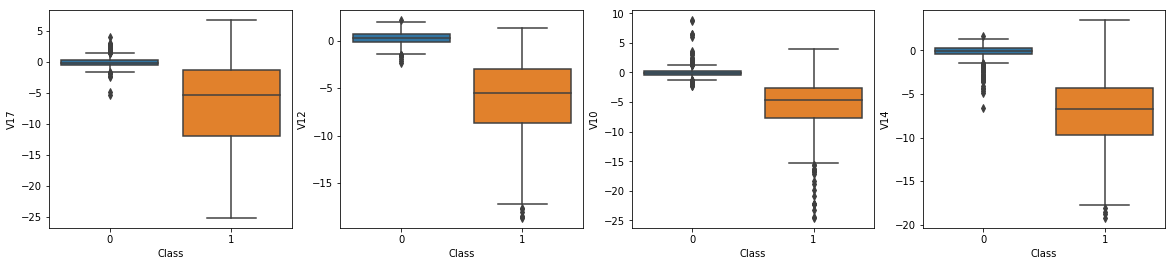

In [17]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
sns.boxplot(x="Class", y="V17", data=under_df,  ax=axes[0])
sns.boxplot(x="Class", y="V12", data=under_df,  ax=axes[1])
sns.boxplot(x="Class", y="V10", data=under_df,  ax=axes[2])
sns.boxplot(x="Class", y="V14", data=under_df,  ax=axes[3])

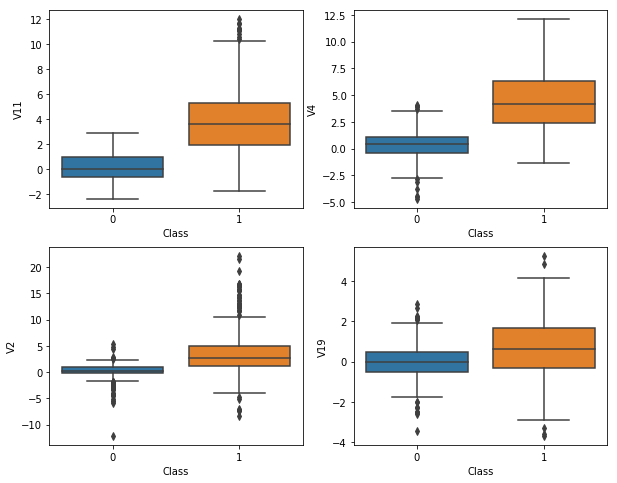

In [18]:
f,axes=plt.subplots(nrows=2,ncols=2,figsize=(10,8))
sns.boxplot(x="Class", y="V11", data=under_df,  ax=axes[0][0])
sns.boxplot(x="Class", y="V4", data=under_df,  ax=axes[0][1])
sns.boxplot(x="Class", y="V2", data=under_df,  ax=axes[1][0])
sns.boxplot(x="Class", y="V19", data=under_df,  ax=axes[1][1])

In [19]:
X = under_df.drop('Class', axis=1)
y = under_df['Class']


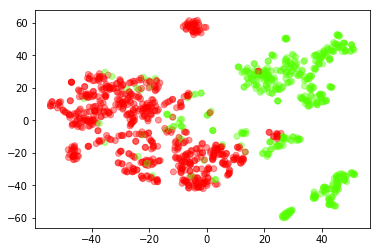

In [20]:
tsne = TSNE(n_components=2, random_state=0, perplexity=20.0,learning_rate=200.0, n_iter=1000, n_iter_without_progress=300)
train_X_tsne = tsne.fit_transform(X, y)

plt.scatter(train_X_tsne[:,0], train_X_tsne[:,1], c=y.values,  cmap='prism', alpha=0.4)

In [21]:
X.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
428,-0.264912,-1.990055,-1.013287,0.512380,0.837259,0.408468,2.078535,4.692662,-0.294088,0.898044,...,2.058913,0.207566,-0.470714,-0.879661,-0.147591,1.003181,0.118079,-0.460627,-0.271700,0.012446
120505,0.045980,-0.399318,-4.793667,3.418911,-5.074445,4.035987,-3.527875,-1.923242,-5.065981,1.996885,...,1.884044,0.342122,1.168618,0.289531,-0.371888,0.144761,0.084735,-0.197431,0.328672,0.835395
128479,-0.113344,-0.338798,-4.312479,1.886476,-2.338634,-0.475243,-1.185444,-2.112079,-2.122793,0.272565,...,-0.009534,-0.718706,0.550541,-0.067870,-1.114692,0.269069,-0.020572,-0.963489,-0.918888,0.001454
55401,-0.349231,-1.008440,-0.481531,1.059542,0.647117,0.905586,0.819368,-0.091184,0.504135,0.161064,...,0.272698,-0.042515,0.070633,0.192491,-0.174659,-0.438908,0.239259,-0.217823,-0.072852,0.010463
74,-0.246401,-1.995572,-1.793406,1.854604,0.979514,1.112262,-0.206403,-0.199546,0.616642,0.064180,...,0.461845,0.667847,-0.180723,0.235138,-0.091442,0.417654,0.122734,-0.232985,0.811880,0.618568


In [22]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(953, 30)
0    547
1    406
Name: Class, dtype: int64
0    153
1     86
Name: Class, dtype: int64


In [24]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

# LOGISTIC REGRESSION

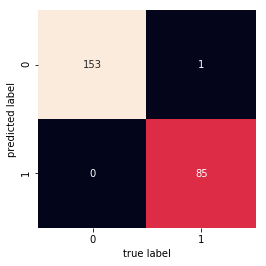

In [25]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
yfit = logreg.predict(X_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       153
           1       1.00      0.99      0.99        86

   micro avg       1.00      1.00      1.00       239
   macro avg       1.00      0.99      1.00       239
weighted avg       1.00      1.00      1.00       239



# SUPPORT VECTOR MACHINES (MAX MARGIN CLASSIFIER)

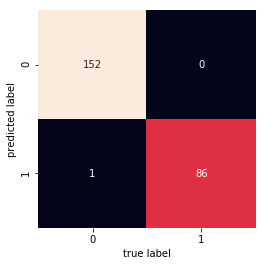

In [27]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=1000,class_weight='balanced')
svc.fit(X_train, y_train)
yfit = svc.predict(X_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yfit))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       153
           1       0.99      1.00      0.99        86

   micro avg       1.00      1.00      1.00       239
   macro avg       0.99      1.00      1.00       239
weighted avg       1.00      1.00      1.00       239



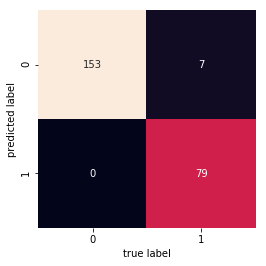

In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf=LinearDiscriminantAnalysis()
clf.fit(X_train, y_train)
yfit = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

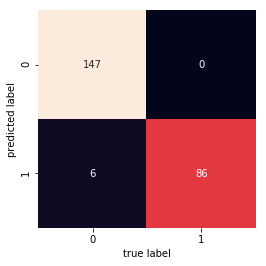

In [30]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf=QuadraticDiscriminantAnalysis()
clf.fit(X_train, y_train)
yfit = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

Here classifiers are giving good results but when we do undersampling there can be loss of information 
let's take test dataset from the original dataset and see how classifiers perform then

In [31]:
x1=df.drop('Class',axis=1)
y1=df['Class']
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.2, random_state=42)

In [32]:
print(X_test1.shape)
print(y_test1.value_counts())

(56962, 30)
0    56864
1       98
Name: Class, dtype: int64


In [33]:
X_train1 = X_train1.values
X_test1 = X_test1.values
y_train1 = y_train1.values
y_test1 = y_test1.values

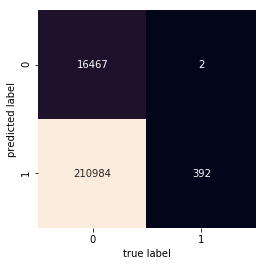

In [34]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=0.1,class_weight='balanced')
svc.fit(X_train, y_train)
yfit = svc.predict(X_train1)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_train1, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
from sklearn.metrics import classification_report
print(classification_report(y_train1, yfit))

              precision    recall  f1-score   support

           0       1.00      0.07      0.14    227451
           1       0.00      0.99      0.00       394

   micro avg       0.07      0.07      0.07    227845
   macro avg       0.50      0.53      0.07    227845
weighted avg       1.00      0.07      0.13    227845



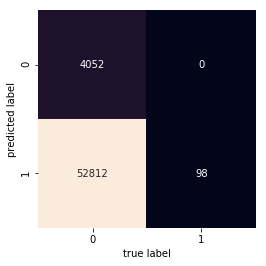

In [36]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=0.1,class_weight='balanced')
svc.fit(X_train, y_train)
yfit = svc.predict(X_test1)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test1, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test1, yfit))

              precision    recall  f1-score   support

           0       1.00      0.07      0.13     56864
           1       0.00      1.00      0.00        98

   micro avg       0.07      0.07      0.07     56962
   macro avg       0.50      0.54      0.07     56962
weighted avg       1.00      0.07      0.13     56962



Classifiers are correctly identifying fradulent transaction but they are ending up classifying non-fradulent 
as fradulent transactions which is not good

# SMOTE ALGORITHM (OVERSAMPLING TECHNIQUE)

In [38]:
x1=df.drop('Class',axis=1)
y1=df['Class']
from sklearn.model_selection import train_test_split
# This is explicitly used for undersampling.
X_train2, X_test2, y_train2, y_test2 = train_test_split(x1, y1, test_size=0.3, random_state=42)

In [39]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = SMOTE().fit_resample(X_train2, y_train2)

In [40]:
print(X_resampled.shape)
print(X_train2.shape)

(398016, 30)
(199364, 30)


In [45]:
X_resampled.shape

(398016, 30)

In [44]:
type(y_resampled)

numpy.ndarray

In [41]:
y_resampled1=y_resampled

In [42]:
y_resampled1=pd.DataFrame(y_resampled1)

In [43]:
type(y_resampled1)

pandas.core.frame.DataFrame

In [44]:
y_resampled1.columns=['a']
y_resampled1['a'].value_counts()

1    199008
0    199008
Name: a, dtype: int64

Now use this as training set and check results couldn't run it on my laptop because of large training set.
But this generally gives better results than undersampling because their is no loss of information

In [ ]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C=0.1,class_weight='balanced')
svc.fit(X_resampled, y_resampled)
yfit = svc.predict(X_test2)
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test2, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');